# Problem Statement 
The target is to predict the sales price for each house. For each Id in the test set, you must predict the value of the
SalePrice variable. 




# Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("C:/Users/ASUS/Downloads/Machine Learning/House Price pred data set")
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Data Collection

In [2]:
df=pd.read_csv('training_set.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratary Data Analysis

<Axes: xlabel='SalePrice', ylabel='Density'>

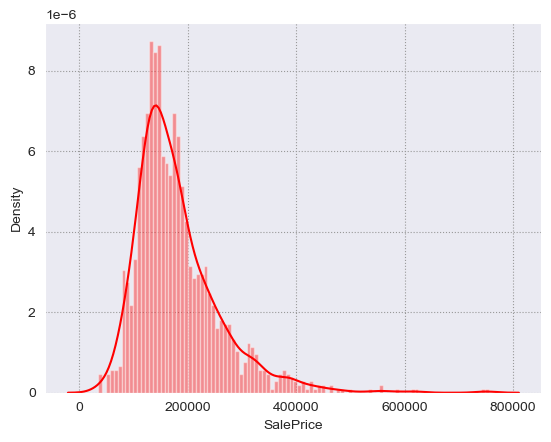

In [6]:
sns.distplot(df['SalePrice'], bins=100 , color='red')

The distribution looks right skewed.

Most of the density lies between 100k and 250k, but there appears to be a lot of outliers on the pricier side.

In [7]:
print('Skewness: %f' % df.SalePrice.skew())

Skewness: 1.882876


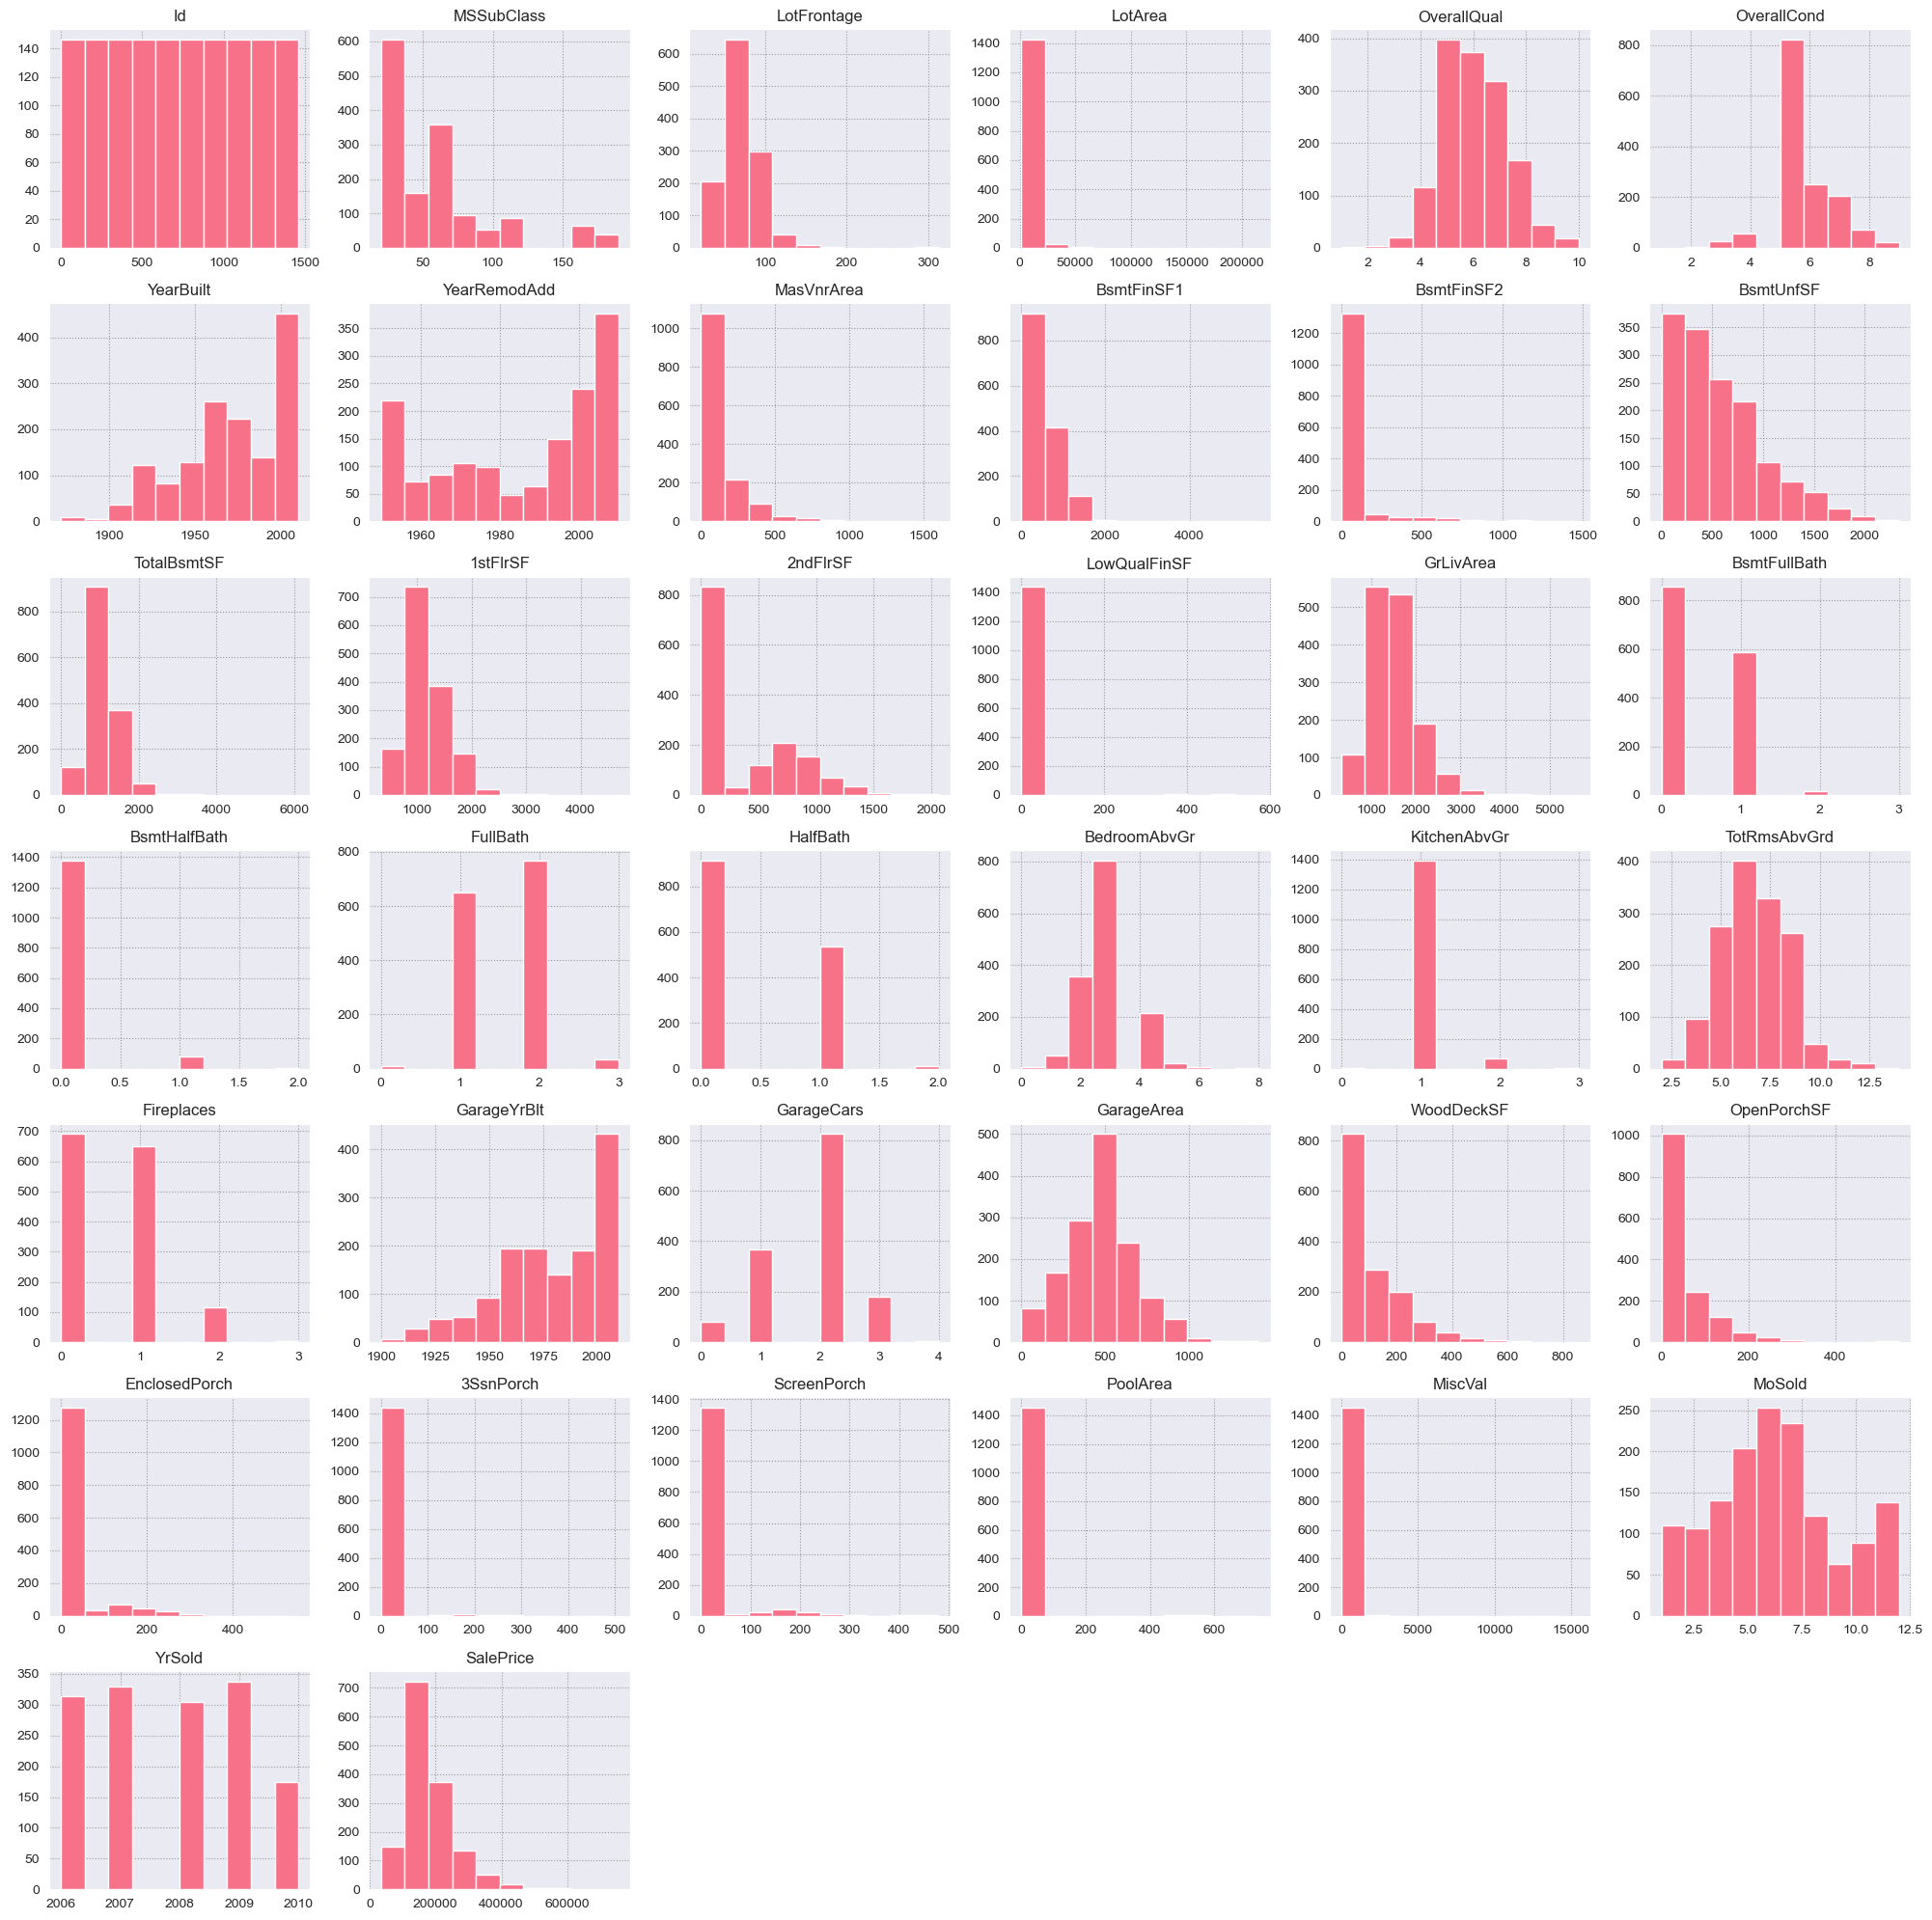

In [8]:
colors = sns.color_palette("husl", 1)
df.hist(figsize=(20, 20), color=colors);

plt.tight_layout()
plt.show()

Let’s have a look at the greater living area (square feet) against the sale price:

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

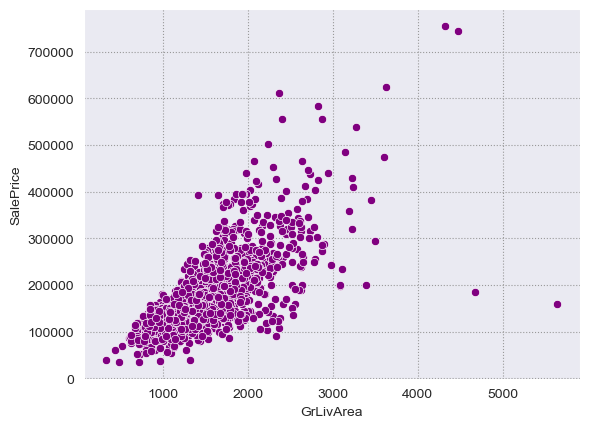

In [9]:
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'], color='purple')

It might’ve expected that larger living area should mean a higher price. This chart shows you’re generally correct. But what are those 2–3 “cheap” houses offering huge living area?

One column might not think about exploring is the “TotalBsmtSF” — Total square feet of the basement area, but let’s do it anyway:



<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

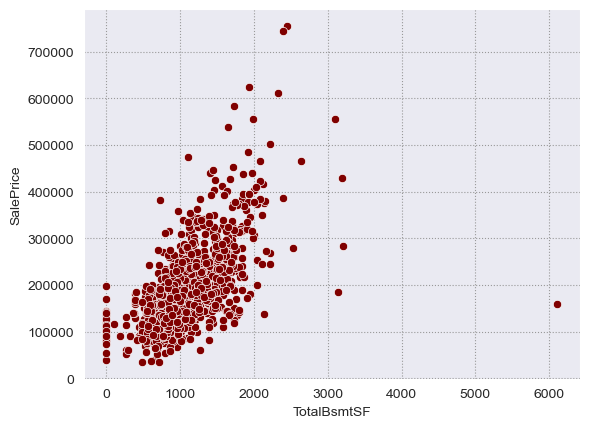

In [10]:
sns.scatterplot(x=df['TotalBsmtSF'],y=df['SalePrice'], color='maroon')

The basement area seems like it might have a lot of predictive power for our model.

Now look at “OverallQual” — overall material and finish quality. Of course, this one seems like a much more subjective feature, so it might provide a bit different perspective on the sale price.

(-0.5, 9.5, 0.0, 800000.0)

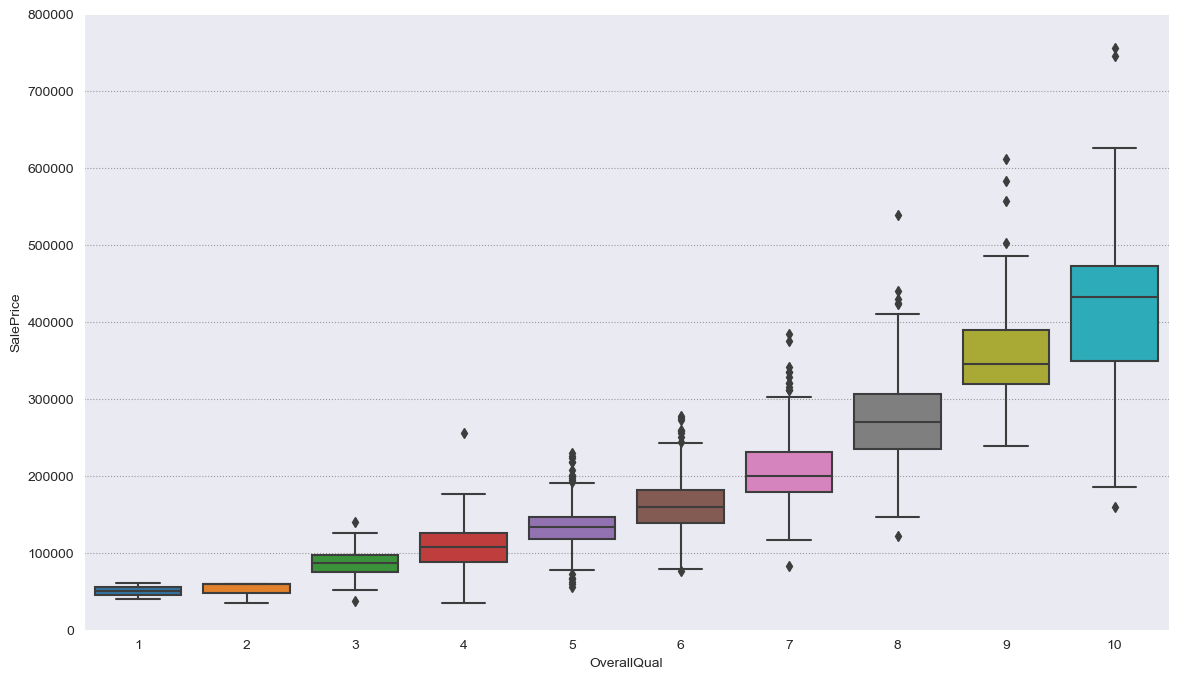

In [11]:
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000)

Everything seems fine for this one.

In [12]:
corr =df.corr(numeric_only = 2)
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

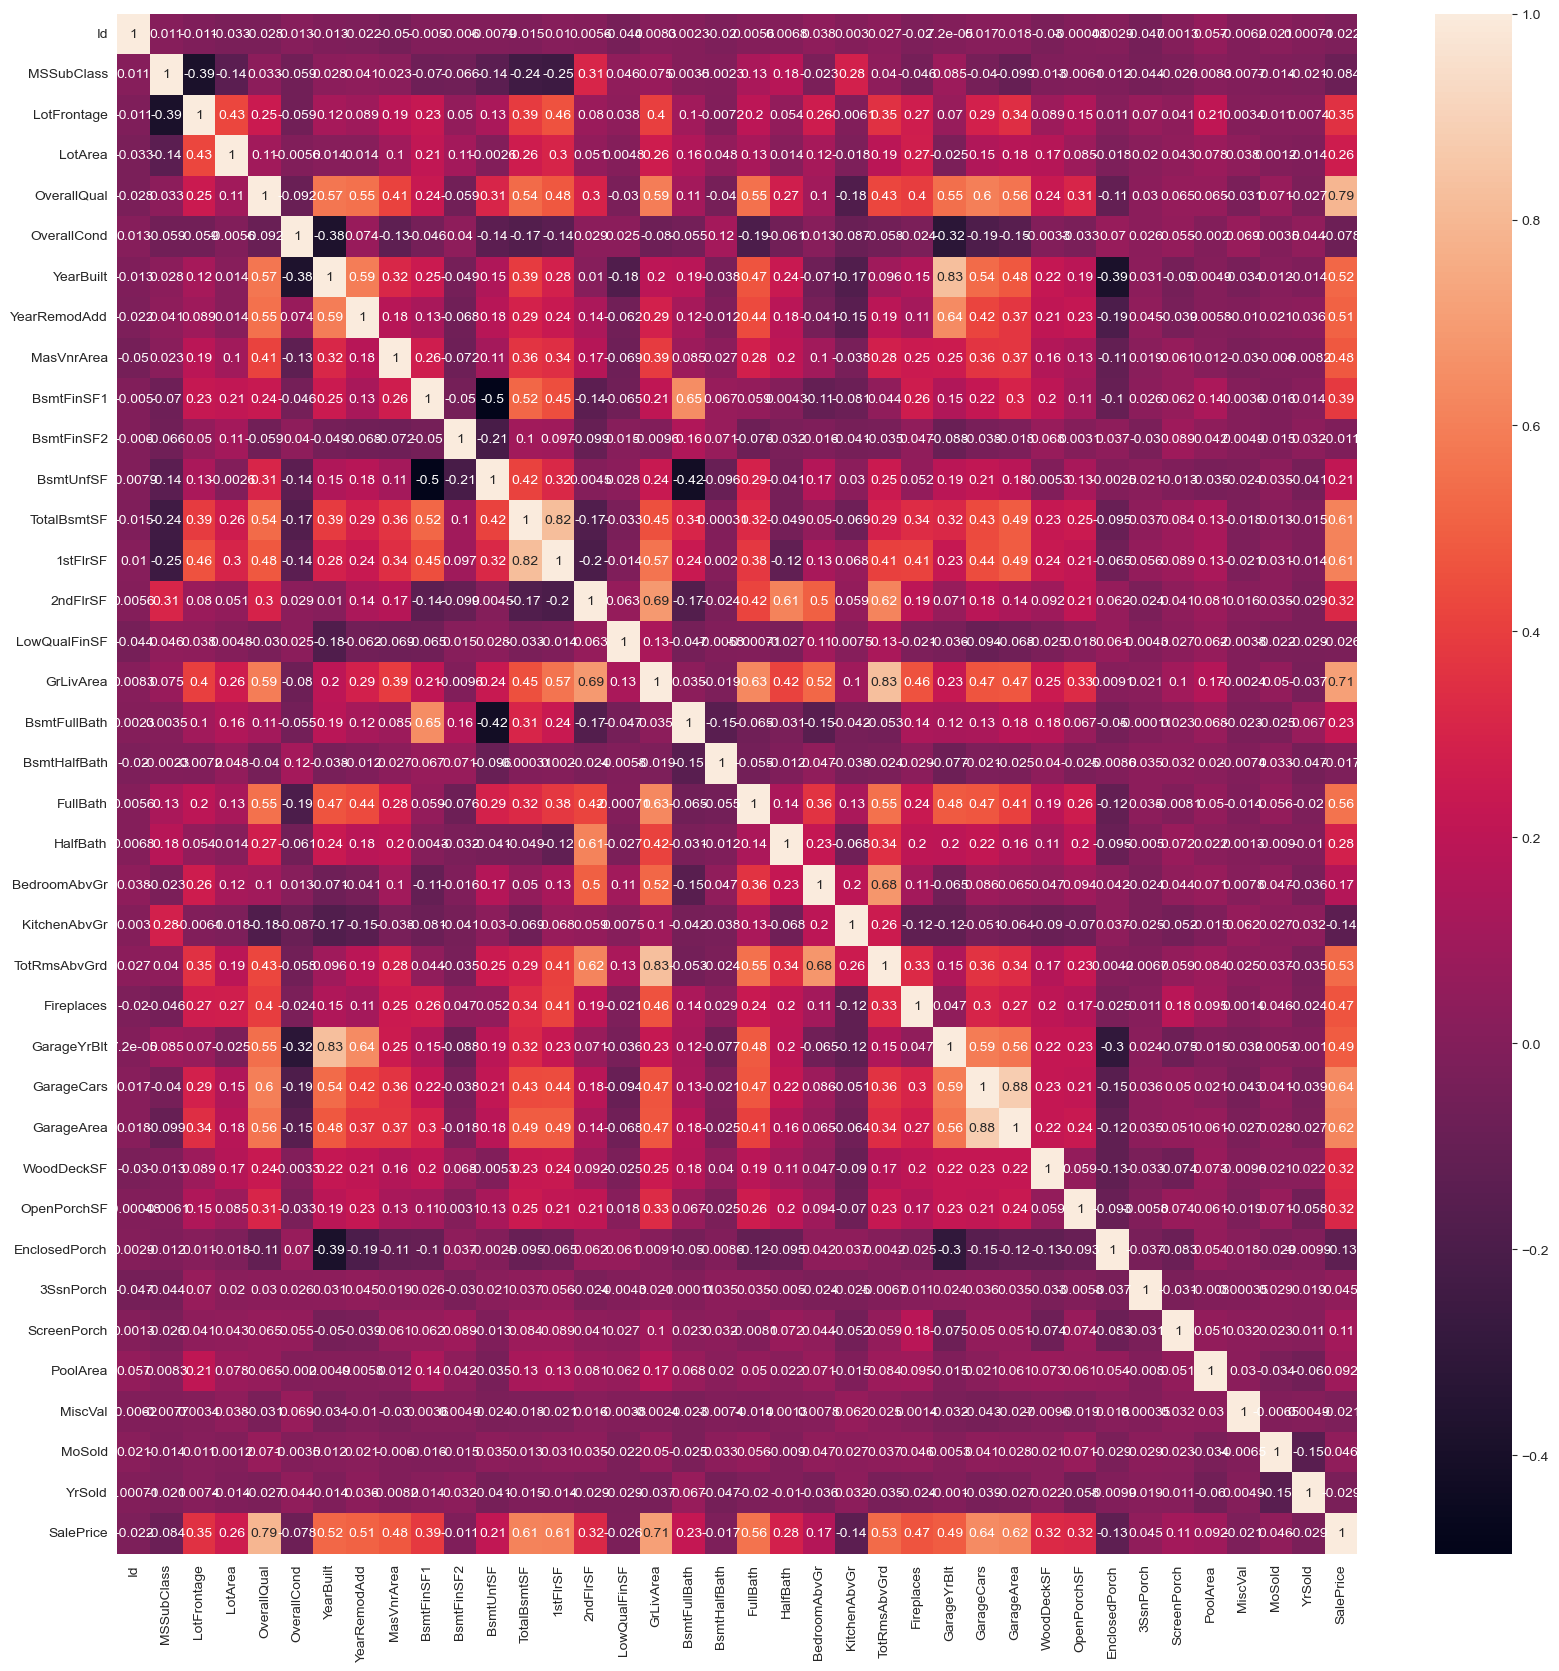

In [13]:
plt.subplots(figsize = (20, 20))
sns.heatmap(corr, annot = True)

There seem to be so many correlations, take some with the best correlations based on the SalePrice data for analysis.

Let’s have a more general view on the top 10 correlated features with the sale price:

<Axes: >

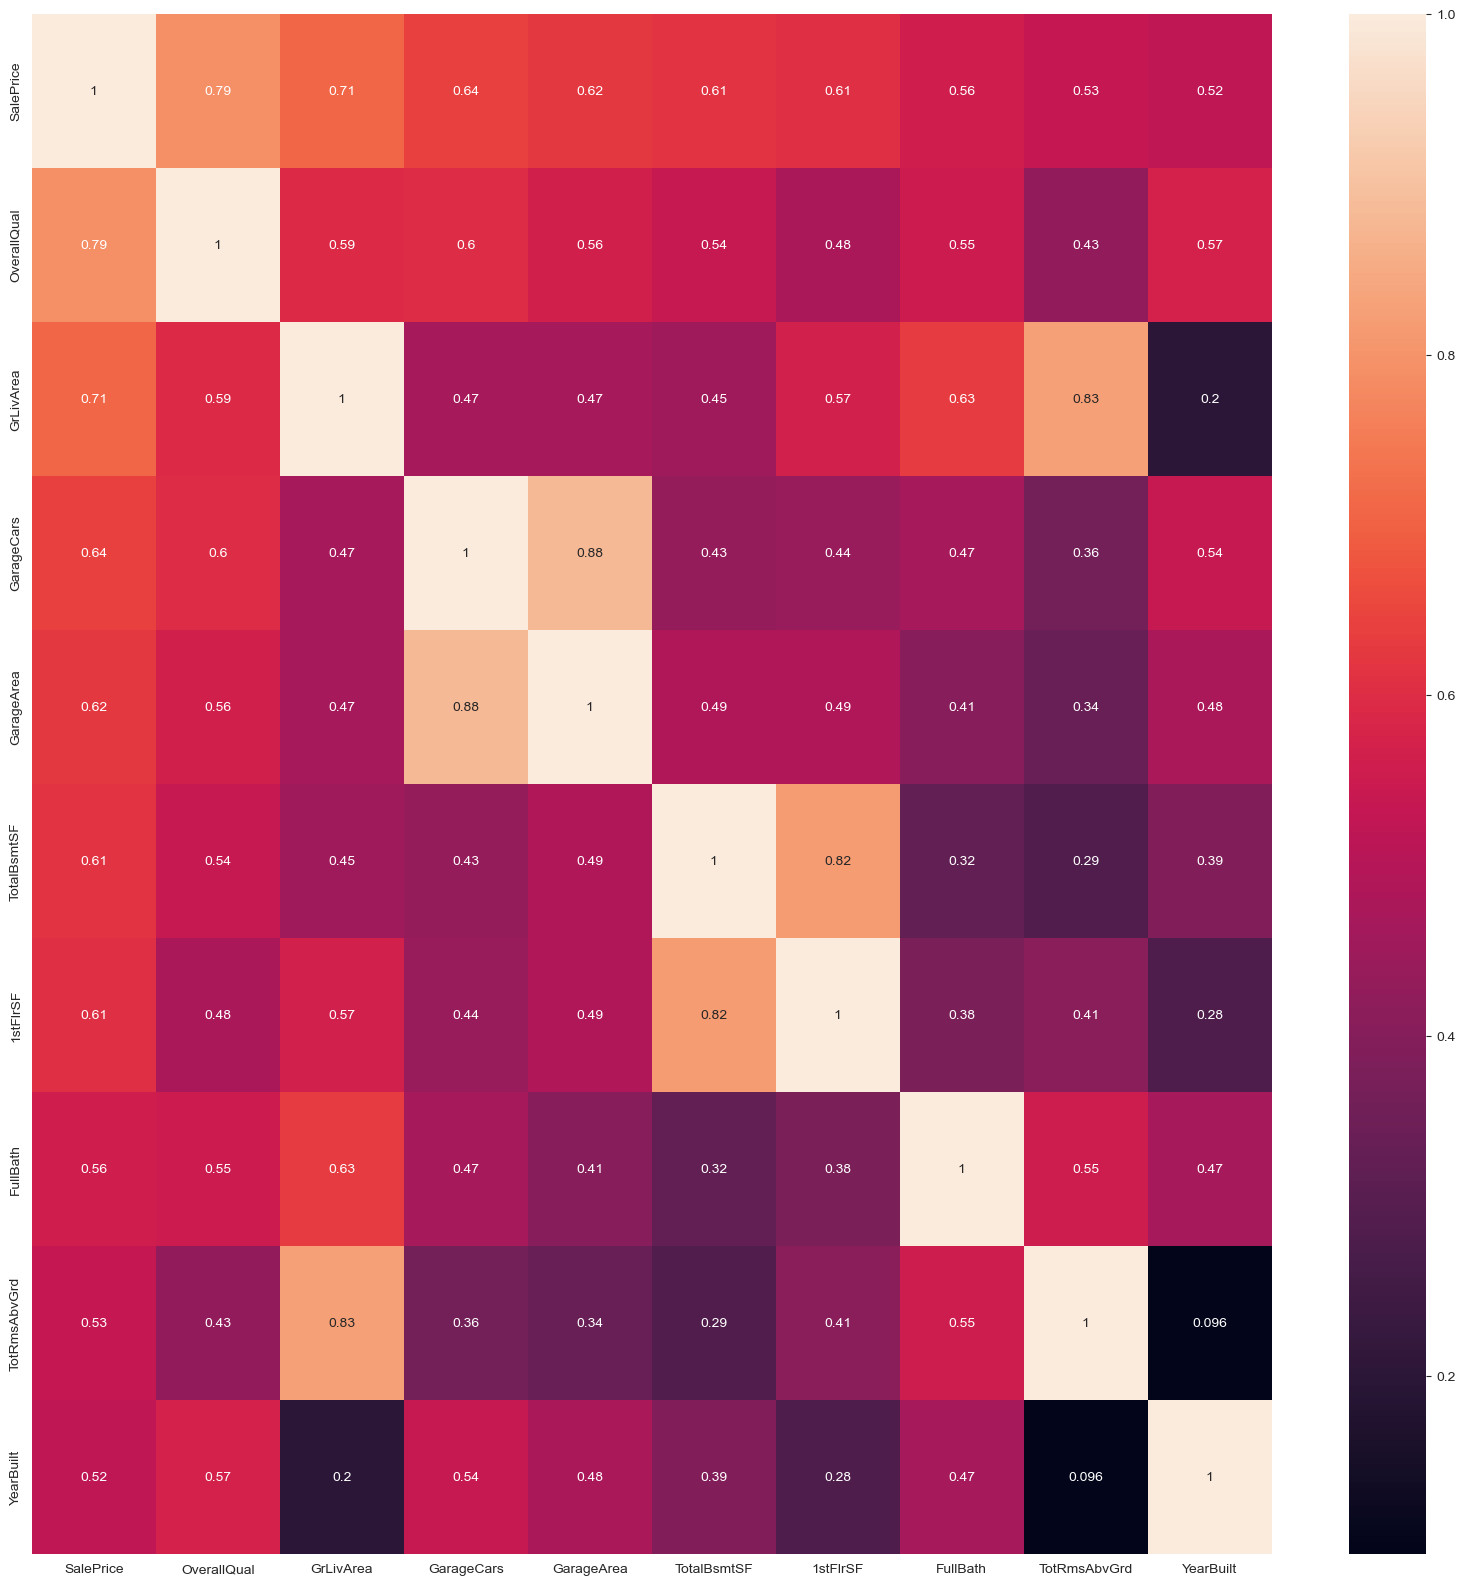

In [14]:
corr_cols = corr['SalePrice'].sort_values(ascending = False).head(10).index
corr_SalePrice = df[corr_cols].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corr_SalePrice, annot = True)

Analyze the linearity of the data that appears above with SalePrice using scatterplot.

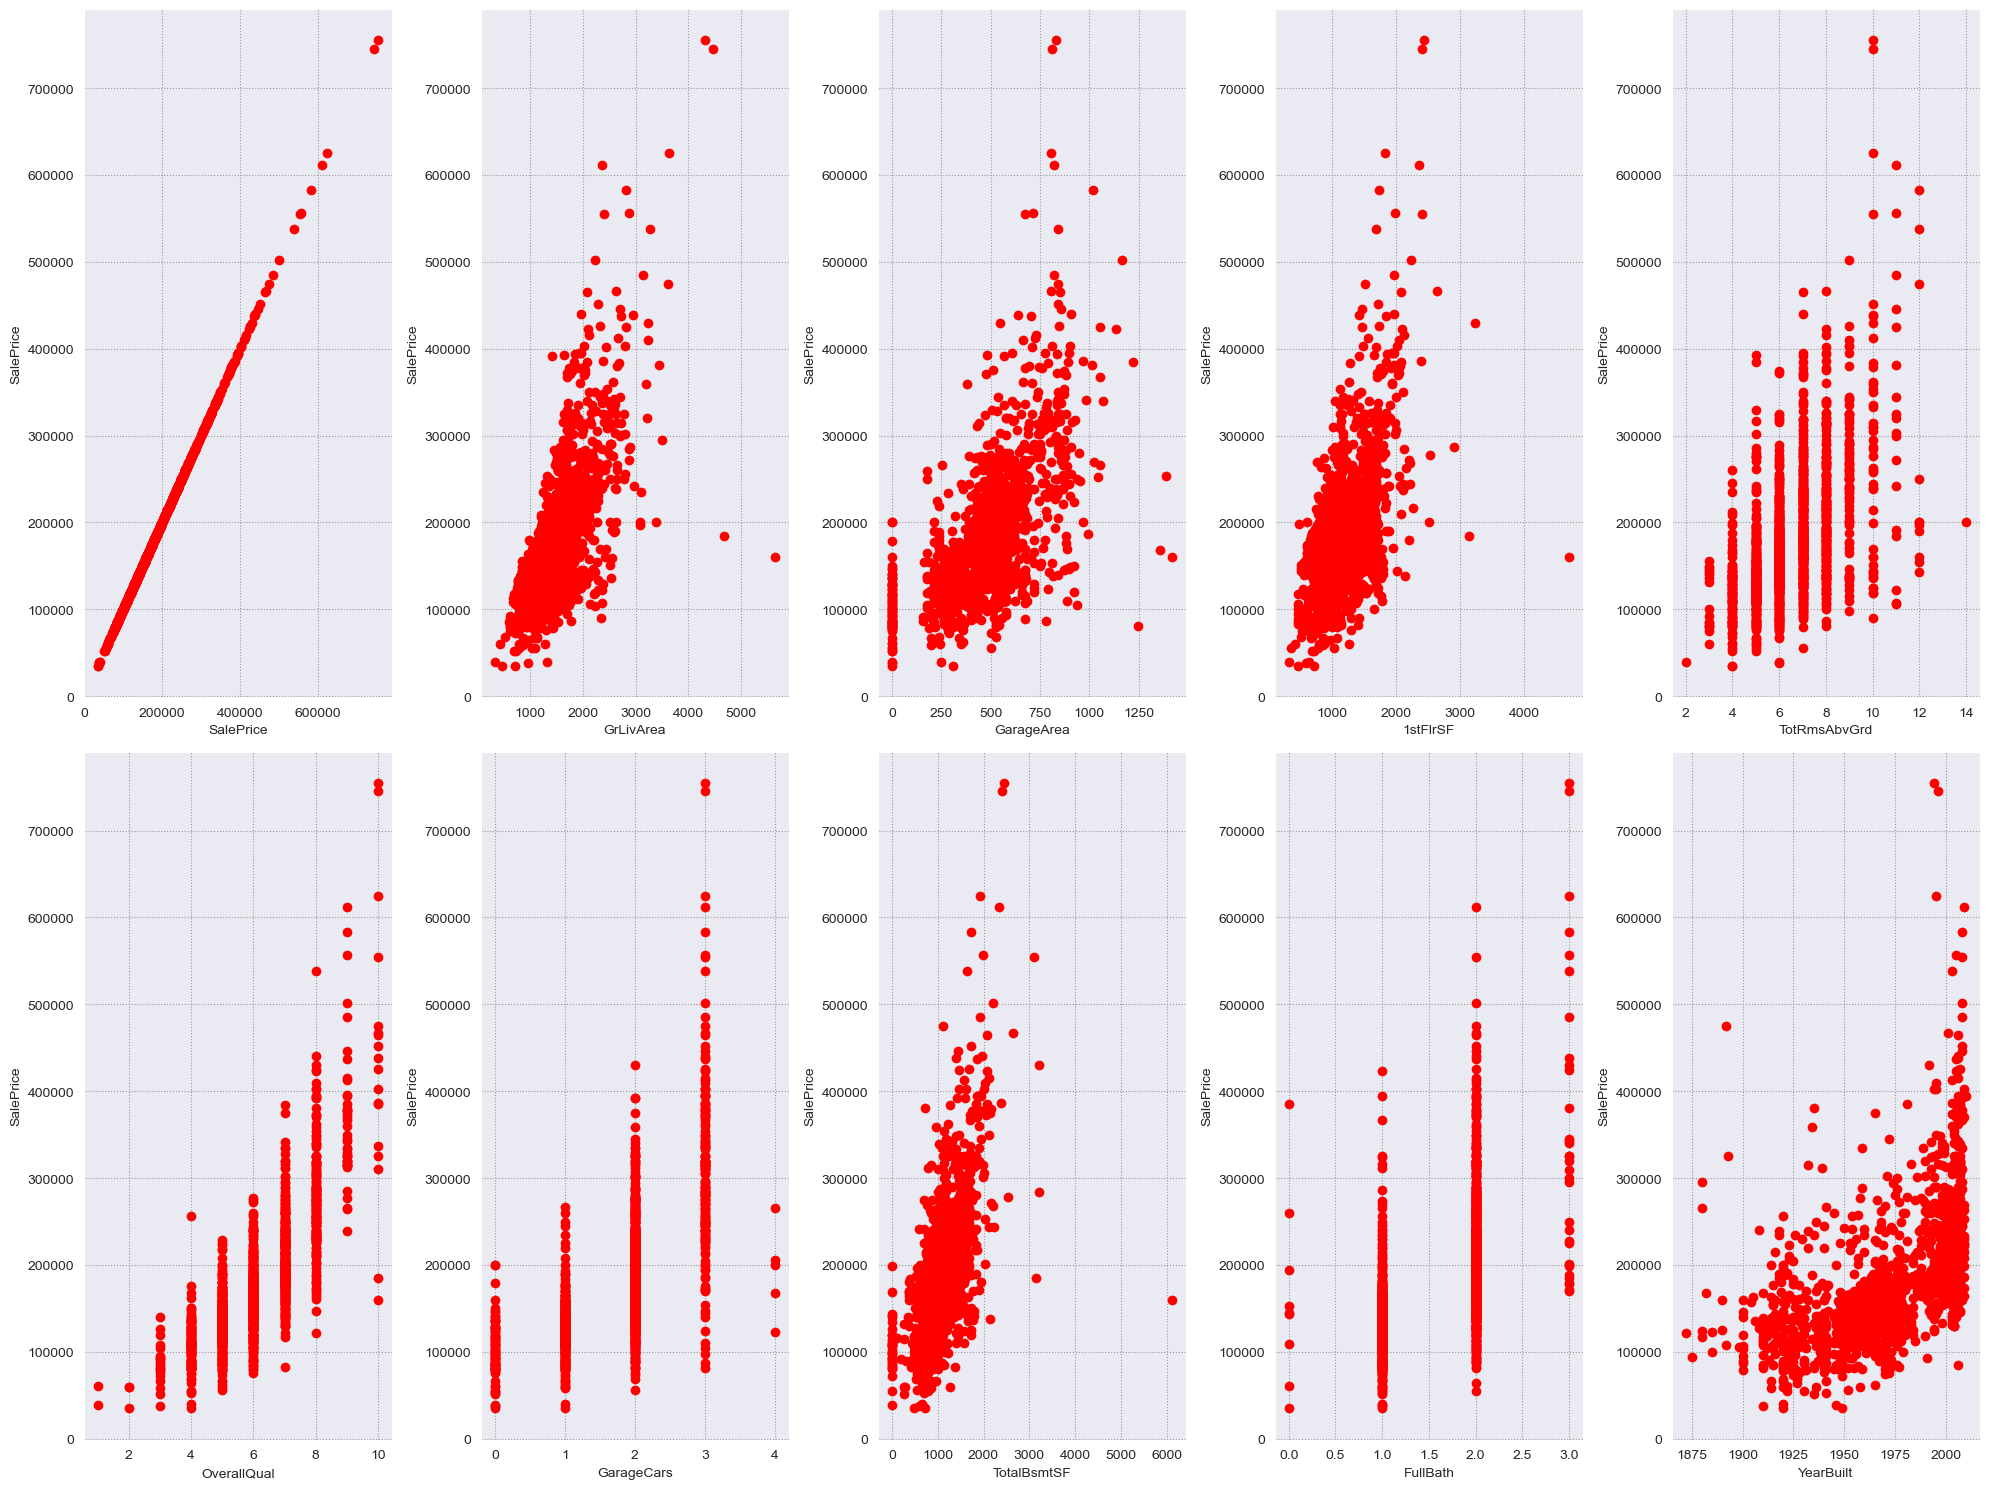

In [15]:
fig, axs = plt.subplots(2, 5, figsize=(20, 15))
x, y = 0, 0
for col in corr_cols:
    axs[x, y].scatter(x=df[col], y=df['SalePrice'], color='red')  
    axs[x, y].set_xlabel(col)
    axs[x, y].set_ylabel('SalePrice')
    x += 1
    if x == 2:
        x = 0
        y += 1
plt.tight_layout()
plt.show()  


1. It can be seen that the OverallQual, GarageCars, FullBath, and TotRmsAbvGrd data are non-numeric data.
2. GrLivArea, TotalBsmtSF, and 1stFirSF data show a linear pattern to SalePrice. 

## Missing Value Handling & Selecting Important Columns

In [16]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
total = df.isnull().sum().sort_values(ascending = False)
pcg = (total / df.isnull().count()).sort_values(ascending = False)
miss_val = pd.concat([total, pcg], axis = 1, keys = ['Total', 'Percentage'])
miss_val.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


1. PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage data have a dominant percentage because it is likely that when people buy a house they don’t pay attention to this aspect and finally the above data is less important. Then the data will be deleted.
 
2. GarageCond, GarageType, GarageYrBlt, GarageFinish and GarageQual data have the same percentage so it can be assumed that the data has binding. This data will be deleted considering that it has been represented by GarageArea and GarageCars data which have a good correlation with SalePrice.
 
3. MasVnrArea and MasVnrType data can be deleted, because they have a positive correlation with OverallQual and YearBuilt data,                                                                                                                             Electrical data can be preserved because it only has 1 missing observation data and this row can be deleted.

I'll process according to what has been analyzed.

In [18]:
drop_col = miss_val[miss_val['Total'] > 1].index
df.drop(drop_col, axis = 1, inplace = True)
df.dropna(subset = ['Electrical'], how = 'any', axis = 0, inplace = True)

In [19]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [20]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [21]:
x=df.drop(['SalePrice',],axis=1)         
y=df['SalePrice']

# Feature Engineering / Preprocessing

In [22]:
y.shape, x.shape

((1459,), (1459, 62))

In [23]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [24]:
print(cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [25]:
print(con)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Seprate Categorical And Continuous Column

In [26]:
#pipelines 
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [27]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [28]:
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Id', 'MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', '...
                                 ['MSZoning', 'Street', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', 'PavedDrive', 'SaleType',
                                  'SaleCondition'])])

In [29]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1

,num_pipe__Id,num_pipe__MSSubClass,num_pipe__LotArea,num_pipe__OverallQual,num_pipe__OverallCond,num_pipe__YearBuilt,num_pipe__YearRemodAdd,num_pipe__BsmtFinSF1,num_pipe__BsmtFinSF2,num_pipe__BsmtUnfSF,...,cat_pipe__Foundation,cat_pipe__Heating,cat_pipe__HeatingQC,cat_pipe__CentralAir,cat_pipe__Electrical,cat_pipe__KitchenQual,cat_pipe__Functional,cat_pipe__PavedDrive,cat_pipe__SaleType,cat_pipe__SaleCondition
0,-1.730625,0.073732,-0.207125,0.650852,-0.517424,1.051899,0.879449,0.574748,-0.288760,-0.944607,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
1,-1.728251,-0.871979,-0.091909,-0.072372,2.178727,0.157540,-0.428864,1.171304,-0.288760,-0.641330,...,1.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0
2,-1.725878,0.073732,0.073401,0.650852,-0.517424,0.985650,0.830993,0.092239,-0.288760,-0.301842,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
3,-1.723504,0.310159,-0.096918,0.650852,-0.517424,-1.863050,-0.719600,-0.499931,-0.288760,-0.061936,...,0.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,8.0,0.0
4,-1.721130,0.073732,0.374967,1.374077,-0.517424,0.952526,0.734081,0.462893,-0.288760,-0.175099,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.723243,0.073732,-0.260525,-0.072372,-0.517424,0.919401,0.734081,-0.973668,-0.288760,0.872789,...,2.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0
1455,1.725617,-0.871979,0.266263,-0.072372,0.381293,0.223789,0.152608,0.758978,0.721688,0.048963,...,1.0,1.0,4.0,1.0,4.0,3.0,2.0,2.0,8.0,4.0
1456,1.727991,0.310159,-0.147814,0.650852,3.077444,-1.001815,1.024817,-0.370531,-0.288760,0.700782,...,4.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
1457,1.730365,-0.871979,-0.080187,-0.795596,0.381293,-0.703695,0.540256,-0.866200,6.090077,-1.284096,...,1.0,1.0,2.0,1.0,0.0,2.0,6.0,2.0,8.0,4.0


# Train Test Split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=23)

# Model Building

In [31]:
lr=LinearRegression()
la=Lasso()
ri=Ridge()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
sv=SVR()

In [32]:
model_list=[lr,la,ri,dt,rf,ab,sv]

In [33]:
# Initialize a dictionary to store the metrics for each model
model_metrics = {}

for model in model_list:
    print(model)
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    tr_pred = model.predict(x_train)
    ts_pred = model.predict(x_test)
    
    # Training metrics
    mse = mean_squared_error(y_train, tr_pred)
    mae = mean_absolute_error(y_train, tr_pred)
    r2 = r2_score(y_train, tr_pred)
    rmse = np.sqrt(mse)
    
    # Testing metrics
    mse_test = mean_squared_error(y_test, ts_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, ts_pred)
    r2_test = r2_score(y_test, ts_pred)
    
    # Store metrics in the dictionary
    model_metrics[model] = {
        'Training': {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2},
        'Testing': {'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test, 'R2': r2_test}
    }
    
    # Print metrics
    print('Training Metrics:')
    print('MSE:', mse)
    print('*' * 40)
    print('RMSE:', rmse)
    print('*' * 40)
    print('MAE:', mae)
    print('*' * 40)
    print('R2:', r2)
    
    print('Testing Metrics:')
    print('MSE:', mse_test)
    print('*' * 40)
    print('RMSE:', rmse_test)
    print('*' * 40)
    print('MAE:', mae_test)
    print('*' * 40)
    print('R2:', r2_test)
    print('=' * 60)  # Separator for different models

# Find the best model based on a chosen metric, e.g., lowest RMSE on testing set
best_model = min(model_metrics, key=lambda m: model_metrics[m]['Testing']['RMSE'])
print(f'The best model is: {best_model}')


LinearRegression()
Training Metrics:
MSE: 1129310594.826241
****************************************
RMSE: 33605.21677993226
****************************************
MAE: 20151.819019334085
****************************************
R2: 0.8282293946878512
Testing Metrics:
MSE: 3.8186545678506076e+27
****************************************
RMSE: 61795263312414.23
****************************************
MAE: 3616294274511.5615
****************************************
R2: -7.27453747050355e+17
Lasso()
Training Metrics:
MSE: 1127819652.3956401
****************************************
RMSE: 33583.026254279706
****************************************
MAE: 20107.237278820856
****************************************
R2: 0.8284561702843639
Testing Metrics:
MSE: 668766013.9261585
****************************************
RMSE: 25860.510705052955
****************************************
MAE: 19778.693951493027
****************************************
R2: 0.8726000652621622
Ridge()
Training Metrics

# RandomForestRegressor is the best model for fit

# Hyperparameter Tuning

In [34]:
grid={
    'n_estimators':range(1,250),
    
   
    'max_depth':range(1,250),
    'min_samples_split':range(1,20),
    'min_samples_leaf':range(1,20),
    'max_features':np.arange(0.1,1,0.1),
    'max_samples':np.arange(0.1,1,0.1)
}

In [35]:
rs=RandomizedSearchCV(rf,param_distributions=grid,cv=3)

In [36]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 250),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(1, 20),
                                        'n_estimators': range(1, 250)})

In [37]:
rs.best_params_

{'n_estimators': 226,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_samples': 0.6,
 'max_features': 0.6,
 'max_depth': 206}

In [38]:
rf1=rs.best_estimator_
rf1

RandomForestRegressor(max_depth=206, max_features=0.6, max_samples=0.6,
                      min_samples_leaf=2, min_samples_split=14,
                      n_estimators=226)

# Training Data Evaluaion of Lasso By Random Search

In [39]:
y_pred_train=rf1.predict(x_train)

mse2=mean_squared_error(y_pred_train,y_train)
rmse2=np.sqrt(mse)
mae2=mean_absolute_error(y_pred_train,y_train)
r2=r2_score(y_pred_train,y_train)

print('RMSE:',rmse2)
print('*'*30)
print('MSE:\n' ,mse2)
print('*'*30)
print('MAE:\n',mae2)
print('*'*30)
print('R2:\n',r2)

RMSE: 83167.89579652116
******************************
MSE:
 541411441.8598595
******************************
MAE:
 13249.785421926757
******************************
R2:
 0.8935827041502918


# Testing data Evaluation of Lasso By Random Search

In [40]:
y_pred=rf1.predict(x_test)

mse3=mean_squared_error(y_pred,y_test)
rmse3=np.sqrt(mse3)
mae3=mean_absolute_error(y_pred,y_test)
r3=r2_score(y_pred,y_test)

print('RMSE:',rmse3)
print('*'*30)
print('MSE:\n' ,mse3)
print('*'*30)
print('MAE:\n',mae3)
print('*'*30)
print('R2:\n',r3)

RMSE: 23406.72331789085
******************************
MSE:
 547874696.4802953
******************************
MAE:
 16887.833121916756
******************************
R2:
 0.868274860669795


# Unseen Data Prediction

In [41]:
df2=pd.read_csv('testing_set.csv')
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [42]:
x2=pd.DataFrame(pre.transform(df2),columns=pre.get_feature_names_out())
x2

,num_pipe__Id,num_pipe__MSSubClass,num_pipe__LotArea,num_pipe__OverallQual,num_pipe__OverallCond,num_pipe__YearBuilt,num_pipe__YearRemodAdd,num_pipe__BsmtFinSF1,num_pipe__BsmtFinSF2,num_pipe__BsmtUnfSF,...,cat_pipe__Foundation,cat_pipe__Heating,cat_pipe__HeatingQC,cat_pipe__CentralAir,cat_pipe__Electrical,cat_pipe__KitchenQual,cat_pipe__Functional,cat_pipe__PavedDrive,cat_pipe__SaleType,cat_pipe__SaleCondition
0,1.735112,-0.871979,0.110671,-0.795596,0.381293,-0.339327,-1.155705,0.052761,0.603905,-0.673016,...,1.0,1.0,4.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0
1,1.737486,-0.871979,0.375668,-0.072372,0.381293,-0.438700,-1.301073,1.050677,-0.288760,-0.365213,...,1.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
2,1.739860,0.073732,0.331886,-0.795596,-0.517424,0.853153,0.637169,0.761171,-0.288760,-0.974029,...,2.0,1.0,2.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0
3,1.742234,0.073732,-0.054038,-0.072372,0.381293,0.886277,0.637169,0.346652,-0.288760,-0.550800,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
4,1.744608,1.492297,-0.552272,1.374077,-0.517424,0.687530,0.346432,-0.396850,-0.288760,1.017638,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.186607,2.438008,-0.859749,-1.518821,1.280010,-0.041207,-0.719600,-0.973668,-0.288760,-0.048357,...,1.0,1.0,2.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0
1455,5.188981,2.438008,-0.863957,-1.518821,-0.517424,-0.041207,-0.719600,-0.420975,-0.288760,-0.618698,...,1.0,1.0,4.0,1.0,4.0,3.0,6.0,2.0,8.0,0.0
1456,5.191355,-0.871979,0.950046,-0.795596,1.280010,-0.372451,0.540256,1.710837,-0.288760,-1.284096,...,1.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,8.0,0.0
1457,5.193729,0.664801,-0.007651,-0.795596,-0.517424,0.687530,0.346432,-0.234552,-0.288760,0.017278,...,2.0,1.0,4.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0


In [43]:
pred = rf1.predict(x2)
pred

array([127612.23902646, 157042.52177948, 178808.94314696, ...,
       159092.56481382, 124639.92700045, 232863.93289751])

In [44]:
prediction=df2[['Id']]
prediction

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [45]:
prediction['SalePrice']=pred
prediction

,Id,SalePrice
0,1461,127612.239026
1,1462,157042.521779
2,1463,178808.943147
3,1464,183444.127113
4,1465,209625.361578
...,...,...
1454,2915,89342.268942
1455,2916,90999.802751
1456,2917,159092.564814
1457,2918,124639.927000


In [46]:
prediction.to_csv('result.csv',index=False)